<a href="https://colab.research.google.com/github/eshreyareddy/pycaret/blob/main/timeseries_forecasting_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

uploaded = files.upload()


Saving DailyDelhiClimateTestsmall.csv to DailyDelhiClimateTestsmall.csv


In [ ]:
import pandas as pd

# Load the dataset
data_path = 'DailyDelhiClimateTestsmall.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2017,15.913043,85.869565,2.743478,59.000000
1,02-01-2017,18.500000,77.222222,2.894444,1018.277778
2,03-01-2017,17.111111,81.888889,4.016667,1018.333333
3,04-01-2017,18.700000,70.050000,4.545000,1015.700000
4,05-01-2017,18.388889,74.944444,3.300000,1014.333333


In [ ]:
# Let's install pycaret
!pip install pycaret-ts-alpha


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.1/468.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pycaret-ts-alpha to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.3/520.3 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 17.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the climate data
climate_data_path = 'DailyDelhiClimateTestsmall.csv'
climate_data = pd.read_csv(climate_data_path)

# Display the first few rows of the dataframe
climate_data.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2017,15.913043,85.869565,2.743478,59.000000
1,02-01-2017,18.500000,77.222222,2.894444,1018.277778
2,03-01-2017,17.111111,81.888889,4.016667,1018.333333
3,04-01-2017,18.700000,70.050000,4.545000,1015.700000
4,05-01-2017,18.388889,74.944444,3.300000,1014.333333


In [ ]:
# Convert the "date" column to datetime data type and set it as the index
climate_data['date'] = pd.to_datetime(climate_data['date'], format='%d-%m-%Y')
climate_data.set_index('date', inplace=True)

# Display the first few rows of the dataframe
climate_data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
!pip install pycaret --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 64.5 MB/s eta 0:0

In [ ]:
import pandas as pd

test_data = pd.read_csv('DailyDelhiClimateTestsmall.csv')

In [ ]:
test_data['date'] = pd.to_datetime(test_data['date'])
test_data.set_index('date', inplace=True)

<ipython-input-11-6c2d2055b8d8>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data['date'] = pd.to_datetime(test_data['date'])


In [ ]:
import pandas as pd
from pycaret.time_series import setup, create_model, predict_model


In [ ]:
!pip install pycaret


In [ ]:
import pandas as pd
from pycaret.time_series import setup, create_model, predict_model


In [ ]:
# Load your data (replace 'your_data.csv' with the actual path to your file)
data = pd.read_csv('DailyDelhiClimateTestsmall.csv')

# Display the first few rows of the dataframe
data.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,01-01-2017,15.913043,85.869565,2.743478,59.000000
1,02-01-2017,18.500000,77.222222,2.894444,1018.277778
2,03-01-2017,17.111111,81.888889,4.016667,1018.333333
3,04-01-2017,18.700000,70.050000,4.545000,1015.700000
4,05-01-2017,18.388889,74.944444,3.300000,1014.333333


In [ ]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Keep only the 'meantemp' column
data = data[['meantemp']]

# Display the first few rows to confirm the changes
data.head()


,meantemp
date,
2017-01-01,15.913043
2017-02-01,18.500000
2017-03-01,17.111111
2017-04-01,18.700000
2017-05-01,18.388889


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['meantemp'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['meantemp'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['date', 'meantemp', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['date', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['date', 'meantemp', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['date', 'count()', None], **{})
chart

In [ ]:
data.head()


,meantemp
date,
2017-01-01,15.913043
2017-02-01,18.500000
2017-03-01,17.111111
2017-04-01,18.700000
2017-05-01,18.388889


In [ ]:
data = data.asfreq('M')


In [ ]:
# Forward fill to handle missing values
data.ffill(inplace=True)

# or use backward fill
# data.bfill(inplace=True)


In [ ]:
s = setup(data, session_id=123, fold_strategy='rolling')


,Description,Value
0,session_id,123
1,Target,meantemp
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(11, 1)"
5,Transformed data shape,"(11, 1)"
6,Transformed train set shape,"(10, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# Creating an ARIMA model
model = create_model('arima')


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2017-07,0.4938,0.2851,1.1934,1.1934,0.0390,0.0397
1,2017-08,0.4825,0.2579,0.9994,0.9994,0.0326,0.0332
2,2017-09,0.4745,0.2372,0.8600,0.8600,0.0281,0.0285
Mean,NaT,0.4836,0.2601,1.0176,1.0176,0.0332,0.0338
SD,NaT,0.0079,0.0196,0.1367,0.1367,0.0045,0.0046


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:

future_forecast = predict_model(model, fh = [i for i in range(1, 13)])
future_forecast.head()


,y_pred
2017-11,29.8700
2017-12,29.2337
2018-01,28.6974
2018-02,28.2454
2018-03,27.8644


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['y_pred'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['y_pred'], **{})
chart

In [ ]:
from pycaret.time_series import plot_model


plot_model(model, plot='residuals')


In [ ]:
import pandas as pd
from pycaret.time_series import setup, create_model, predict_model


In [ ]:

data = pd.read_csv('DailyDelhiClimateTestsmall.csv', parse_dates=['date'], index_col='date')


data.head()


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-02-01,18.500000,77.222222,2.894444,1018.277778
2017-03-01,17.111111,81.888889,4.016667,1018.333333
2017-04-01,18.700000,70.050000,4.545000,1015.700000
2017-05-01,18.388889,74.944444,3.300000,1014.333333


In [ ]:

data_reset = data.reset_index()

# Create date features
data_reset['year'] = data_reset['date'].dt.year
data_reset['month'] = data_reset['date'].dt.month
data_reset['day'] = data_reset['date'].dt.day
data_reset['dayofweek'] = data_reset['date'].dt.dayofweek

# Display the first few rows to verify the changes
data_reset.head()


,date,meantemp,humidity,wind_speed,meanpressure,year,month,day,dayofweek
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1,1,6
1,2017-02-01,18.500000,77.222222,2.894444,1018.277778,2017,2,1,2
2,2017-03-01,17.111111,81.888889,4.016667,1018.333333,2017,3,1,2
3,2017-04-01,18.700000,70.050000,4.545000,1015.700000,2017,4,1,5
4,2017-05-01,18.388889,74.944444,3.300000,1014.333333,2017,5,1,0


In [ ]:
from pycaret.regression import *

# Setup the regression environment
reg_setup = setup(data=data_reset, target='meantemp', ignore_features=['date'])


,Description,Value
0,Session id,3859
1,Target,meantemp
2,Target type,Regression
3,Original data shape,"(114, 9)"
4,Transformed data shape,"(114, 8)"
5,Transformed train set shape,"(79, 8)"
6,Transformed test set shape,"(35, 8)"
7,Ignore features,1
8,Numeric features,7
9,Preprocess,True


In [ ]:

lr_model = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6724,4.5083,2.1233,0.9037,0.1192,0.1016
1,1.8697,4.9107,2.2160,0.8556,0.0977,0.0833
2,2.5527,9.3313,3.0547,0.8279,0.1527,0.1440
3,1.3865,2.7900,1.6703,0.9504,0.0720,0.0624
4,2.4565,9.4791,3.0788,0.7736,0.1557,0.1240
5,1.7541,3.9900,1.9975,0.8510,0.1092,0.0898
6,1.4153,2.8052,1.6749,0.8426,0.0894,0.0756
7,2.4492,9.4713,3.0775,0.8227,0.1550,0.1352
8,1.4904,2.9329,1.7126,0.8530,0.0767,0.0717


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

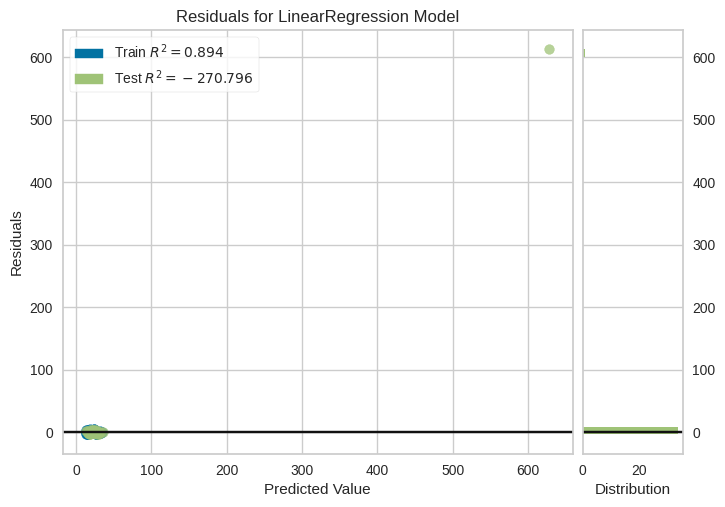

In [ ]:

plot_model(lr_model, plot = 'residuals')


In [ ]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

future_dates = [data_reset['date'].max() + DateOffset(months=i) for i in range(1, 13)]
future_data = pd.DataFrame(future_dates, columns=['date'])


future_data['year'] = future_data['date'].dt.year
future_data['month'] = future_data['date'].dt.month
future_data['day'] = future_data['date'].dt.day
future_data['dayofweek'] = future_data['date'].dt.dayofweek


future_data['humidity'] = 80.23
future_data['wind_speed'] = 5.65


future_data.head()


,date,year,month,day,dayofweek,humidity,wind_speed
0,2018-01-04,2018,1,4,3,80.23,5.65
1,2018-02-04,2018,2,4,6,80.23,5.65
2,2018-03-04,2018,3,4,6,80.23,5.65
3,2018-04-04,2018,4,4,2,80.23,5.65
4,2018-05-04,2018,5,4,4,80.23,5.65


In [ ]:
# Add column for 'meanpressure' with future values
future_data['meanpressure'] = 1100 # add future values for 'meanpressure'


In [ ]:
# Making predictions for the future periods
future_predictions = predict_model(lr_model, data=future_data.drop(columns=['date']))

# Display the predictions
future_predictions.head()


,year,month,day,dayofweek,humidity,wind_speed,meanpressure,prediction_label
0,2018,1,4,3,80.230003,5.65,1100,-37.186745
1,2018,2,4,6,80.230003,5.65,1100,-37.359707
2,2018,3,4,6,80.230003,5.65,1100,-37.636942
3,2018,4,4,2,80.230003,5.65,1100,-38.053210
4,2018,5,4,4,80.230003,5.65,1100,-38.260929


In [ ]:
# Making predictions for the future periods
future_predictions = predict_model(lr_model, data=future_data.drop(columns=['date']))

# Display the predictions
future_predictions.head()


,year,month,day,dayofweek,humidity,wind_speed,meanpressure,prediction_label
0,2018,1,4,3,80.230003,5.65,1100,-37.186745
1,2018,2,4,6,80.230003,5.65,1100,-37.359707
2,2018,3,4,6,80.230003,5.65,1100,-37.636942
3,2018,4,4,2,80.230003,5.65,1100,-38.053210
4,2018,5,4,4,80.230003,5.65,1100,-38.260929


In [ ]:
# Create a random forest regression model
rf_model = create_model('rf')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9105,7.0311,2.6516,0.8498,0.1489,0.1242
1,1.7369,4.2249,2.0555,0.8758,0.0981,0.0794
2,1.7853,5.4785,2.3406,0.8990,0.1326,0.1071
3,1.1073,1.9787,1.4067,0.9648,0.0548,0.0481
4,1.5671,4.0615,2.0153,0.9030,0.0894,0.0769
5,1.7284,3.9339,1.9834,0.8531,0.0987,0.0822
6,1.7110,5.5102,2.3474,0.6909,0.0995,0.0806
7,3.2219,13.7990,3.7147,0.7417,0.1838,0.1761
8,1.6842,3.9772,1.9943,0.8007,0.0928,0.0800


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
data = data.asfreq('D')  # For daily frequency
data = data.asfreq('M')  # For monthly frequency


In [ ]:
from pycaret.regression import *

# Data preparation to include date features and exogenous variables
# ...

reg_setup = setup(data=data_reset, target='meantemp', ignore_features=['date'])

# Create a regression model
lr_model = create_model('lr')

# Predict on new data
future_predictions = predict_model(lr_model, data=future_data.drop(columns=['date']))


,Description,Value
0,Session id,8905
1,Target,meantemp
2,Target type,Regression
3,Original data shape,"(114, 9)"
4,Transformed data shape,"(114, 8)"
5,Transformed train set shape,"(79, 8)"
6,Transformed test set shape,"(35, 8)"
7,Ignore features,1
8,Numeric features,7
9,Preprocess,True


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6743,4.0145,2.0036,0.8837,0.1184,0.1058
1,1.7832,4.1745,2.0432,0.8763,0.0974,0.0897
2,1.2955,3.5325,1.8795,0.9044,0.1105,0.0837
3,2.2256,7.0624,2.6575,0.7244,0.1413,0.1116
4,1.4352,2.5819,1.6068,0.9510,0.0809,0.0727
5,1.6027,4.8312,2.1980,0.8364,0.0953,0.0773
6,1.4808,4.1280,2.0317,0.9016,0.1279,0.0927
7,1.8331,5.1876,2.2776,0.8802,0.1068,0.0870
8,1.8563,4.5623,2.1360,0.9057,0.1088,0.0997


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['  '], **{})
chart